In [24]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras import layers, models, regularizers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [25]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [26]:
rows, cols = 28, 28

# Reshape the data into a 4D Array
x_train = x_train.reshape(x_train.shape[0], rows, cols, 1)
x_test = x_test.reshape(x_test.shape[0], rows, cols, 1)

In [27]:
input_shape = (rows,cols,1) 

# Set type as float32 and normalize the values to [0,1]
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train / 255.0
x_test = x_test / 255.0

# Transform labels to one hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [28]:
def build_lenet(input_shape):
  # Define Sequential Model
  model = tf.keras.Sequential()
  
  # C1 Convolution Layer
  model.add(tf.keras.layers.Conv2D(filters=6, strides=(1,1), kernel_size=(5,5), activation='tanh', input_shape=input_shape))
  
  # S2 SubSampling Layer
  model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

  # C3 Convolution Layer
  model.add(tf.keras.layers.Conv2D(filters=6, strides=(1,1), kernel_size=(5,5), activation='tanh', kernel_regularizer=regularizers.l2(0.01)))

  # S4 SubSampling Layer
  model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

  # C5 Fully Connected Layer
  model.add(tf.keras.layers.Dense(units=120, activation='tanh'))

  # Flatten the output so that we can connect it with the fully connected layers by converting it into a 1D Array
  model.add(tf.keras.layers.Flatten())

  # FC6 Fully Connected Layers
  model.add(tf.keras.layers.Dense(units=84, activation='tanh'))

  # Dropout Layer
  model.add(tf.keras.layers.Dropout(0.5))

  # Output Layer
  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

  # Compile the Model
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  return model


In [29]:
lenet = build_lenet(input_shape)

history = lenet.fit(x_train, y_train, epochs=10, batch_size=128, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7810 - loss: 0.7872 - val_accuracy: 0.9367 - val_loss: 0.2490
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9227 - loss: 0.3024 - val_accuracy: 0.9656 - val_loss: 0.1475
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9536 - loss: 0.1889 - val_accuracy: 0.9735 - val_loss: 0.1108
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9592 - loss: 0.1613 - val_accuracy: 0.9772 - val_loss: 0.0983
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9650 - loss: 0.1391 - val_accuracy: 0.9778 - val_loss: 0.0898
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9679 - loss: 0.1247 - val_accuracy: 0.9809 - val_loss: 0.0795
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9700 - loss: 0.1179 - val_accuracy: 0.9818 - val_loss: 0.0741
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9707 - loss: 0.1147 - val_accuracy: 0.9830

In [30]:
# Check Accuracy of the Model
loss ,acc= lenet.evaluate(x_test, y_test)
print('Accuracy : ', acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9802 - loss: 0.0752
Accuracy :  0.9840999841690063


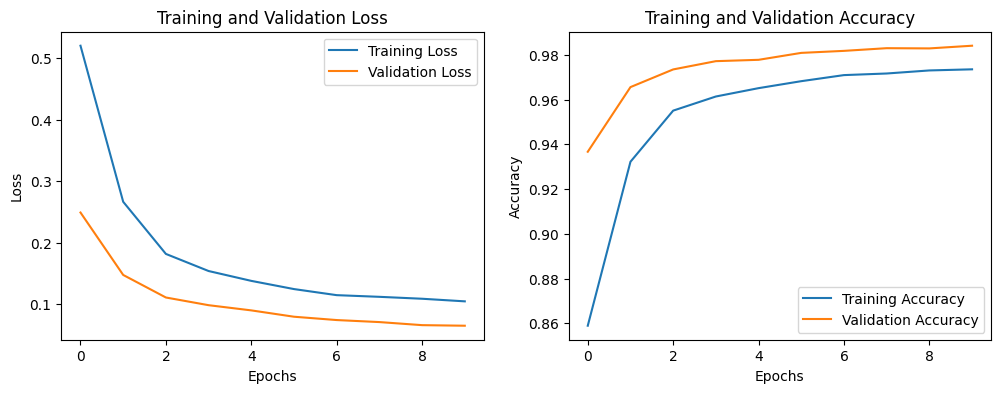

In [31]:
# Visualize the Training and Validation Curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


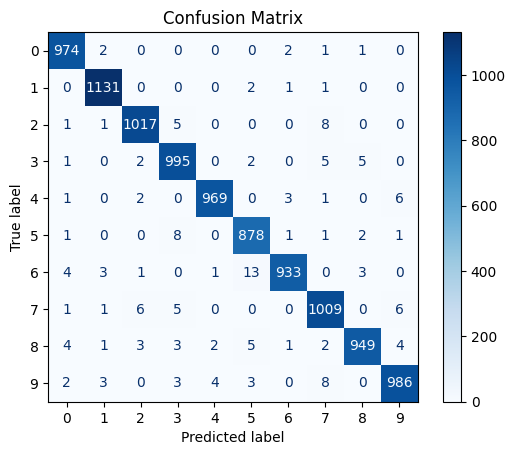

In [32]:
# Predict class labels for test data
y_pred = np.argmax(lenet.predict(x_test), axis=1)

# Convert one-hot encoded y_test back to class labels
y_test_labels = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test_labels, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
